In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

Задание 1  
Вычислите производную функции:  

tg^2(sin(x)+cos(2x+3))

в точке x0 = 1

In [ ]:

x = sp.symbols('x')
f = sp.tan(sp.sin(x) + sp.cos(2*x + 3))**2

f_prime = sp.diff(f, x)
print("Производная:", f_prime)

value_f_prime = f_prime.subs(x, 1)

print(f"Значение производной : {value_f_prime:.2f}")

Производная: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение производной : 55.39


Задание 2  
Дан объект в 2D пространстве  
При помощи матричных операций выполните:  
Масштабирование и смещение объекта (применить 2 матрицы трансформаций).   
Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200.0, 200.0)

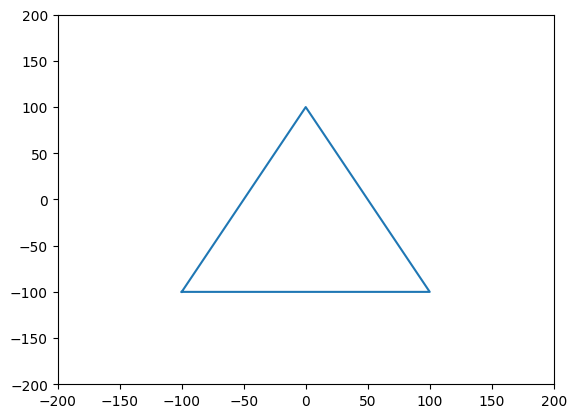

In [ ]:

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-400.0, 400.0)

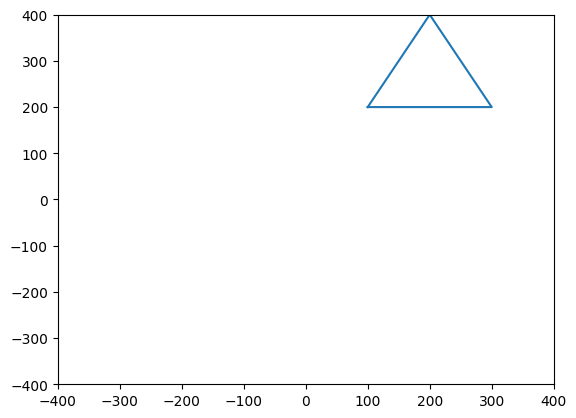

In [ ]:
"""Матрица смещения"""
M = np.array([
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
])

res = M @ A.transpose()
M1 = res.transpose()
A1 = np.array(M1)
x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([-400, 400])
plt.xlim([-400, 400])

(-200.0, 200.0)

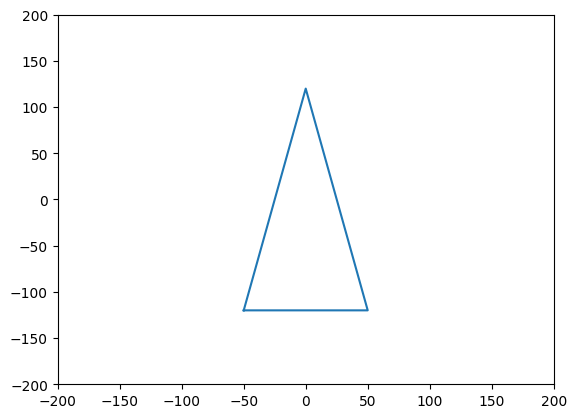

In [ ]:
"""Матрица масштабирования"""
MS = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])

res = MS @ A.transpose()
M2 = res.transpose()
A2 = np.array(M2)
x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Задание 3  
Найдите собственные значения и собственные вектора матрицы:

In [2]:
m = np.array([[1, 4],
              [1, 1]])
print(m)
values, vectors = np.linalg.eig (m)
print("значения:",values)
print("вектора:\n",vectors)

[[1 4]
 [1 1]]
значения: [ 3. -1.]
вектора:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Задание 4  
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.  
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

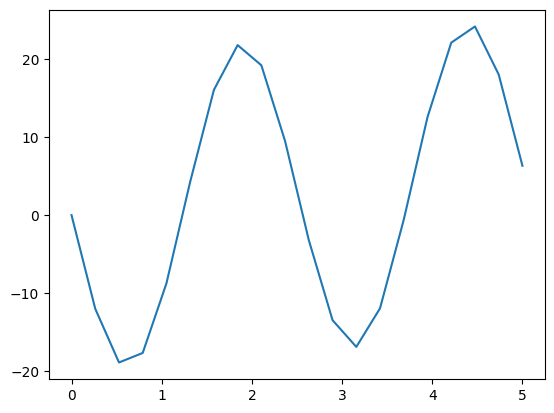

Оптимальные параметры: [ 2.99999999 21.37610416]


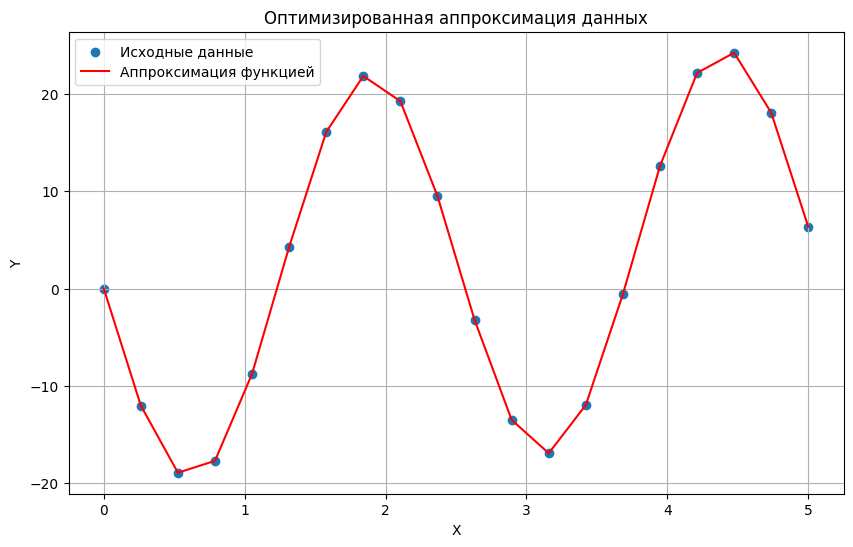

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x


x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

initial_guess = [0.26, 21.8]  # начальное приближение для a и b
res = minimize(error, initial_guess, method= 'CG')
optimal_params = res.x
print('Оптимальные параметры:', optimal_params)

y_pred = f(x, optimal_params[0], optimal_params[1])
plt.figure(figsize=(10, 6))
plt.scatter(x, fx, label="Исходные данные")
plt.plot(x, y_pred, color='red', label="Аппроксимация функцией")
plt.legend()
plt.title("Оптимизированная аппроксимация данных")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


Задание 5  
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))  
Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

def cos_similar (matrix):
  """подсчет нормы векторов"""
  norm_vectors = np.linalg.norm(matrix, axis = 1, keepdims= True)
  """подсчет нормы матрицы"""
  norm_matrix = matrix / norm_vectors
  """расчет косинусного сходства"""
  similarity_matrix = np.dot(norm_matrix, norm_matrix.transpose())
  return similarity_matrix

print(cos_similar(raitings))

[[1.         0.82602919 0.84921529 0.78340116 0.81917632 0.74118548
  0.72735828 0.80967522 0.91065982 0.86010776]
 [0.82602919 1.         0.81234325 0.84635337 0.87138052 0.82713107
  0.82629684 0.80026003 0.82526308 0.81968127]
 [0.84921529 0.81234325 1.         0.84669374 0.78394299 0.79097985
  0.67616223 0.76289552 0.82112077 0.91873051]
 [0.78340116 0.84635337 0.84669374 1.         0.69153409 0.78665792
  0.83274211 0.82934667 0.7770666  0.8588687 ]
 [0.81917632 0.87138052 0.78394299 0.69153409 1.         0.7764434
  0.78200468 0.81236869 0.87948477 0.84574789]
 [0.74118548 0.82713107 0.79097985 0.78665792 0.7764434  1.
  0.74011801 0.84451685 0.80622876 0.85514908]
 [0.72735828 0.82629684 0.67616223 0.83274211 0.78200468 0.74011801
  1.         0.82669174 0.81130044 0.79154718]
 [0.80967522 0.80026003 0.76289552 0.82934667 0.81236869 0.84451685
  0.82669174 1.         0.7981276  0.83682229]
 [0.91065982 0.82526308 0.82112077 0.7770666  0.87948477 0.80622876
  0.81130044 0.798127